# The numpy gradient method

Here we look the numpy gradient method and explain the mathematics behind it. The situation is that we have a function known at discrete points. The gradient method will approximate the "derivative" of this function. The simpler situation is where the points are evenly spaced as illustrated by the first graph, but the gradient method can handle irregularly spaced points as well as in the second graph: 

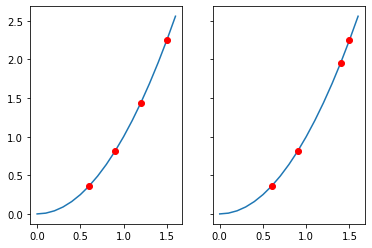

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,1.7,0.1)
y = x*x

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.plot([0.6,0.9,1.2,1.5],[0.36,.81,1.44, 2.25],'ro')

ax2.plot(x, y)
ax2.plot([0.6,0.9,1.4,1.5],[0.36,.81,1.96,2.25],'ro')

The starting point is the Taylor series approximation formula. For a $C^2$ continuous function:

$$f(x+h)=f(x)+f^{\prime}(x)h+f^{\prime\prime}(\xi)\frac{h^{2}}{2},\qquad\xi\in(x,x+h).$$

We may solve for $f^\prime(x)$ and obtain the first order approximation
$$
f^{\prime}(x)=\frac{f(x+h)-f(x)}{h}+O(h).
$$
Can we do better than this? Yes indeed. 

We assume that the function $C^3$. The Taylor series theorem than gives us
$$
f(x+h)=f(x)+f^{\prime}(x)h+f^{\prime\prime}(x)\frac{h^{2}}{2}+f^{\prime\prime\prime}(\xi_{+})\frac{h^{3}}{6}
$$
We also have the formula replacing $h$ with $-h$:
$$
f(x-h)=f(x)-f^{\prime}(x)h+f^{\prime\prime}(x)\frac{h^{2}}{2}-f^{\prime\prime\prime}(\xi_{-})\frac{h^{3}}{6}
$$
Subtracting these two formulas a a miracle happens, the $f(x)$ term _and_ the $f^{\prime\prime}(x)$ terms vanish. Again we solve for $f^{\prime}(x)$ to find:
$$
f^{\prime}(x)=\frac{f(x+h)-f(x-h)}{2h}+\left(f^{\prime\prime\prime}(\xi_{+})+f^{\prime\prime\prime}(\xi_{-})\right)\frac{h^{2}}{12}
$$
or 
$$
f^{\prime}(x)=\frac{f(x+h)-f(x-h)}{2h}+O(h^{2})
$$

Let us try this out manually. We assume a function on a uniformly intervals, say customers visiting a small shop on given days. Suppose $f(0)=3,f(1)=6,f(2)=5,f(3)=9$. 

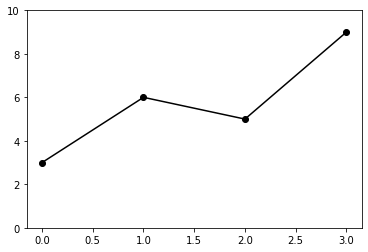

In [34]:
f = np.array([3,6,5,9])
plt.plot(f, '-ok')
plt.ylim(0, 10);
plt.show()

At the endpoints, $x=0$ and $x=3$, we have to use the first order approximation formulae:

$$f^{\prime}(x)=\frac{f(x+h)-f(x)}{h},\qquad f^{\prime}(x)=\frac{f(x)-f(x-h)}{h}$$ 

respectively and we get $f^{\prime}(0)=\frac{f(1)-f(0)}{1}=(6-3)/1=3$ and 
$f^{\prime}(3)=\frac{f(3)-f(2)}{1}=(9-5)/1=4$. 

But on the interior points $x=1,2$, we can use the second order approximations:
$$
f^{\prime}(1)=\frac{f(2)-f(0)}{2\cdot 1}=(5-3)/2=1,\qquad
f^{\prime}(2)=\frac{f(3)-f(1)}{2\cdot 1}=(9-6)/2=1.5
$$

Let's see if this agrees:

In [35]:
np.gradient(f)

array([3. , 1. , 1.5, 4. ])

Cool. 

Now let's imagine a situation where one is counting cars through a rural intersection every 30 minutes = 1/2 hour. 
You start at 7 in the morning. 
The data is $f(7.5)=3,f(8)=6,f(8.5)=5,f(9)=9$. The data looks very familiar! Here is the graph:

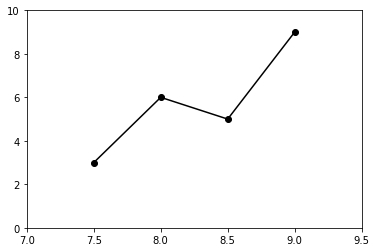

In [36]:
x = np.array([7.5,8,8.5,9])
f = np.array([3,6,5,9])
plt.plot(x,f, '-ok')
plt.ylim(0, 10)
plt.xlim(7,9.5)
plt.show()

The net effect is simply replacing the interval from 1 to 1/2. If we are dividing by 1/2 instead of 1, the results should double the previous calculations.

In [37]:
np.gradient(f,0.5)

array([6., 2., 3., 8.])

In [38]:
# Alternatively, we can specify the x values...
np.gradient(f,x)

array([6., 2., 3., 8.])

Note that having the initial start point at 7.5 doesn't change if we have the start point at 0. It is the interval width's that matter. 

The above alternative method is how we have numpy calculate the gradient with non-uniform intervals. But how does numpy do it? Imagine we are at a data point and the previous interval width is $h_-$ and the following interval width is $h_+$. 

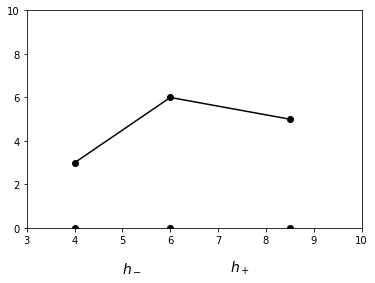

In [39]:
x = np.array([4,6,8.5])
f = np.array([3,6,5])
plt.plot(x,f, '-ok')
plt.plot(x,np.zeros(3),'ok')
plt.ylim(0, 10)
plt.xlim(3,10)
plt.text(5, -2, '$h_-$',fontsize=14)
plt.text(7.25, -2, '$h_+$',fontsize=14)
plt.show()

We consider the function to be $C^3$. The Taylor series gives us

$$
f(x+h_{+})=f(x)+f^{\prime}(x)h_{+}+f^{\prime\prime}(x)\frac{h_{+}^{2}}{2}+f^{\prime\prime\prime}(\xi_{+})\frac{h_{+}^{3}}{6}
$$
and
$$
f(x-h_{-})=f(x)-f^{\prime}(x)h_{-}+f^{\prime\prime}(x)\frac{h_{-}^{2}}{2}-f^{\prime\prime\prime}(\xi_{-})\frac{h_{-}^{3}}{6}
$$
where $\xi_{+}\in(x,x+h)$ and $\xi_{-}\in(x-h,x)$. We want to eliminate the $f^{\prime\prime}(x)$. We multiply the first by $h_{-}^{2}$ and the second by $h_{+}^{2}$ and subtract, then solve for $f^{\prime}(x)$. In this case, unlike previously, the $f(x)$ term is not eliminated. The resulting formula is somewhat complicated:

$$
\frac{\left(f(x+h_{+})-f(x)\right)h_{-}^{2}-\left(f(x-h_{-})-f(x)\right)h_{+}^{2}}{h_{+}h_{-}^{2}+h_{-}h_{+}^{2}}+O(\max(h_+,h_-)^2).
$$

Note that it reduces to the other formula when $h_+,h_-$. 

We can check this formula for the above data, $h_-=2$, $h_+=2.5$, $x=6$, $f(4)=3$, $f(6)=6$, $f(8.5)=5$. The beginning and end terms use the standard first degree approximation. The middle term uses the more complicated formula:


In [40]:
((5-6)*2**2-(3-6)*2.5**2)/(2.5*2**2+2*2.5**2)


0.6555555555555556

In [41]:
np.gradient(f,x)

array([ 1.5       ,  0.65555556, -0.4       ])

So far the "gradient" really has been simply the derivative approximation. Let us turn to the situation of a function of more than one variable. We consider the following situation. We take a 5 day sample of swallows feeding at our bird feeders (European or African?). We count the number between 7-9:30, 9:30-12, 12-2:30, 2:30-5. It is spring so there seems to be an upward trend as the weather warms. 

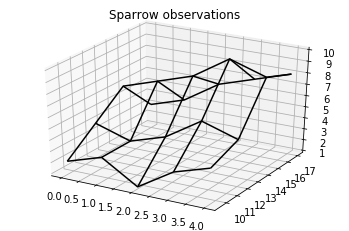

In [42]:
day = np.array([0,1,2,3,4]) 
time = np.array([9.5,12.0,14.5,17.0])

Day,Time = np.meshgrid(day, time)
    
data = np.array([
        [2,3,1,3,4],
        [4,3,4,6,5],
        [6,7,8,10,9],
        [3,4,6,7,8]
        ])
# (The columns represent the daily observations. The rows are fixed time observations for a each day, e.g.,
# the second row is the count 

#
# Here is the code to plot it...
#
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Day, Time, data, color='black')
ax.set_title('Sparrow observations')
plt.show()

The sparrow observations rise through the day but fall in the late afternoon. There is also a trend of increasing numbers through the week. The partial derivatives should reflect this. The gradient will be a pair of $4\times 5$ matrices, the partial derivative approximations in each variable. 

In [44]:
np.gradient(data,1,2.5) # the intervals for the day variable is 1 vs 2.5 hours for the time variable. 

[array([[ 2. ,  0. ,  3. ,  3. ,  1. ],
        [ 2. ,  2. ,  3.5,  3.5,  2.5],
        [-0.5,  0.5,  1. ,  0.5,  1.5],
        [-3. , -3. , -2. , -3. , -1. ]]),
 array([[ 0.4, -0.2,  0. ,  0.6,  0.4],
        [-0.4,  0. ,  0.6,  0.2, -0.4],
        [ 0.4,  0.4,  0.6,  0.2, -0.4],
        [ 0.4,  0.6,  0.6,  0.4,  0.4]])]

The first matrix represents the approximations to $\frac\partial{\partial \textrm{ day}}$ and second matrix represents the approximations to $\frac\partial{\partial \textrm{ time}}$. (For example, the 0 in the first row of the first matrix is due to the fact that there were 3 sparrows observed in the first and second time periods of the second day.)